<a href="https://colab.research.google.com/github/aakhavi/Machine-Learning-in-Python/blob/main/GSB_545_Recurrent_Neural_Networks_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GSB 545 Recurrent Neural Networks Activity
# Arash Akhavi
# 5/16/2022

In [ ]:
import pandas as pd
import numpy as np
import sklearn 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from numpy import mean
from numpy import std
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Flatten, TimeDistributed, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt

In [ ]:
# read in data
data = pd.read_csv("/content/drive/MyDrive/GSB 545 Data/ma_lga_12345.csv")
data.head()

,saledate,MA,type,bedrooms
0,30/09/2007,441854,house,2
1,31/12/2007,441854,house,2
2,31/03/2008,441854,house,2
3,30/06/2008,441854,house,2
4,30/09/2008,451583,house,2


In [ ]:
data.columns

Index(['saledate', 'MA', 'type', 'bedrooms'], dtype='object')

# Data Prepreation

In [ ]:
# scale MA for RNN
scaler = MinMaxScaler()
data[['MA', 'bedrooms']] = scaler.fit_transform(data[['MA', 'bedrooms']])
data.head()

,saledate,MA,type,bedrooms
0,30/09/2007,0.178463,house,0.25
1,31/12/2007,0.178463,house,0.25
2,31/03/2008,0.178463,house,0.25
3,30/06/2008,0.178463,house,0.25
4,30/09/2008,0.192342,house,0.25


In [ ]:
# create dummy varaibles for 'type' house & unit
def label_encode(data, variable_list):
  for i in variable_list:
    data[i] = LabelEncoder().fit(data[i]).transform(data[i])
  return data

In [ ]:
var = ['type']
data = label_encode(data, var)
data.head()

,saledate,MA,type,bedrooms
0,30/09/2007,0.178463,0,0.25
1,31/12/2007,0.178463,0,0.25
2,31/03/2008,0.178463,0,0.25
3,30/06/2008,0.178463,0,0.25
4,30/09/2008,0.192342,0,0.25


In [ ]:
# change 'saledate' to date_time
data['saledate'] = pd.to_datetime(data['saledate'])
data

,saledate,MA,type,bedrooms
0,2007-09-30,0.178463,0,0.25
1,2007-12-31,0.178463,0,0.25
2,2008-03-31,0.178463,0,0.25
3,2008-06-30,0.178463,0,0.25
4,2008-09-30,0.192342,0,0.25
...,...,...,...,...
342,2018-09-30,0.408744,1,0.50
343,2018-12-31,0.405728,1,0.50
344,2019-03-31,0.412105,1,0.50
345,2019-06-30,0.403121,1,0.50


We will only be using the price variable for the RNN time series prediction.

In [ ]:
# define response and predictors
data = data['MA']

In [ ]:
data

0      0.178463
1      0.178463
2      0.178463
3      0.178463
4      0.192342
         ...   
342    0.408744
343    0.405728
344    0.412105
345    0.403121
346    0.401045
Name: MA, Length: 347, dtype: float64

In [ ]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(data, split_percent=0.8):
    data = np.array(data.values.astype('float32'))
    #data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data

In [ ]:
train_data, test_data = get_train_test(data, split_percent=0.8)

In [ ]:
def get_XY(data, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(data), time_steps)
    Y = data[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = data[range(time_steps*rows_x)]
    print(X.shape)
    print(rows_x)
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y

In [ ]:
time_steps = 2
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

(276,)
138
(68,)
34


# Simple RNN Model 1




In [ ]:
model1 = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model1.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
138/138 - 2s - loss: 0.3606 - 2s/epoch - 13ms/step
Epoch 2/20
138/138 - 0s - loss: 0.1054 - 235ms/epoch - 2ms/step
Epoch 3/20
138/138 - 0s - loss: 0.0631 - 214ms/epoch - 2ms/step
Epoch 4/20
138/138 - 0s - loss: 0.0441 - 230ms/epoch - 2ms/step
Epoch 5/20
138/138 - 0s - loss: 0.0321 - 226ms/epoch - 2ms/step
Epoch 6/20
138/138 - 0s - loss: 0.0244 - 226ms/epoch - 2ms/step
Epoch 7/20
138/138 - 0s - loss: 0.0186 - 216ms/epoch - 2ms/step
Epoch 8/20
138/138 - 0s - loss: 0.0149 - 219ms/epoch - 2ms/step
Epoch 9/20
138/138 - 0s - loss: 0.0121 - 214ms/epoch - 2ms/step
Epoch 10/20
138/138 - 0s - loss: 0.0103 - 220ms/epoch - 2ms/step
Epoch 11/20
138/138 - 0s - loss: 0.0090 - 220ms/epoch - 2ms/step
Epoch 12/20
138/138 - 0s - loss: 0.0081 - 211ms/epoch - 2ms/step
Epoch 13/20
138/138 - 0s - loss: 0.0076 - 223ms/epoch - 2ms/step
Epoch 14/20
138/138 - 0s - loss: 0.0073 - 222ms/epoch - 2ms/step
Epoch 15/20
138/138 - 0s - loss: 0.0071 - 215ms/epoch - 2ms/step
Epoch 16/20
138/138 - 0s - loss: 0.0

In [ ]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    

In [ ]:
# make predictions
train_predict = model1.predict(trainX)
test_predict = model1.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.082 RMSE
Test RMSE: 0.019 RMSE


In [ ]:
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Price scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

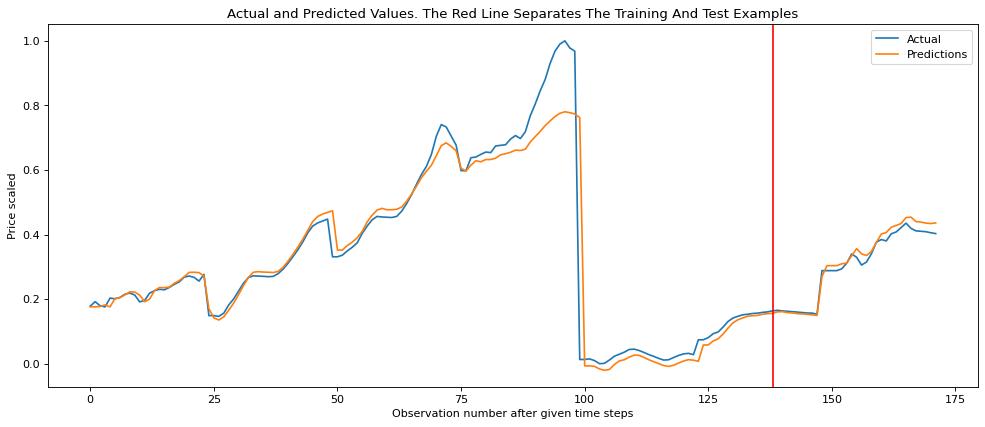

In [ ]:
plot_result(trainY, testY, train_predict, test_predict)

After attempting a model we can now change the parameters and look at different train test splits and time steps

# Simple RNN Model 2

In [ ]:
train_data, test_data = get_train_test(data, split_percent=0.5)

In [ ]:
time_steps = 4
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

(172,)
43
(172,)
43


In [ ]:
model2 = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model2.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
43/43 - 2s - loss: 0.0417 - 2s/epoch - 39ms/step
Epoch 2/20
43/43 - 0s - loss: 0.0045 - 117ms/epoch - 3ms/step
Epoch 3/20
43/43 - 0s - loss: 0.0024 - 123ms/epoch - 3ms/step
Epoch 4/20
43/43 - 0s - loss: 0.0023 - 119ms/epoch - 3ms/step
Epoch 5/20
43/43 - 0s - loss: 0.0023 - 128ms/epoch - 3ms/step
Epoch 6/20
43/43 - 0s - loss: 0.0023 - 119ms/epoch - 3ms/step
Epoch 7/20
43/43 - 0s - loss: 0.0023 - 117ms/epoch - 3ms/step
Epoch 8/20
43/43 - 0s - loss: 0.0022 - 121ms/epoch - 3ms/step
Epoch 9/20
43/43 - 0s - loss: 0.0021 - 109ms/epoch - 3ms/step
Epoch 10/20
43/43 - 0s - loss: 0.0022 - 119ms/epoch - 3ms/step
Epoch 11/20
43/43 - 0s - loss: 0.0021 - 135ms/epoch - 3ms/step
Epoch 12/20
43/43 - 0s - loss: 0.0021 - 133ms/epoch - 3ms/step
Epoch 13/20
43/43 - 0s - loss: 0.0021 - 108ms/epoch - 3ms/step
Epoch 14/20
43/43 - 0s - loss: 0.0020 - 109ms/epoch - 3ms/step
Epoch 15/20
43/43 - 0s - loss: 0.0019 - 106ms/epoch - 2ms/step
Epoch 16/20
43/43 - 0s - loss: 0.0023 - 113ms/epoch - 3ms/step
Epo

In [ ]:
# make predictions
train_predict = model2.predict(trainX)
test_predict = model2.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.042 RMSE
Test RMSE: 0.118 RMSE


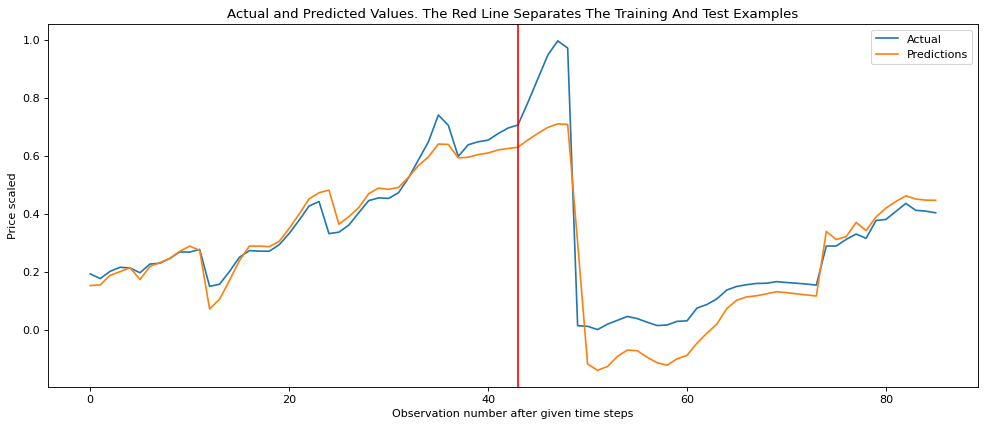

In [ ]:
plot_result(trainY, testY, train_predict, test_predict)

In this model we lowered the split between the train and test from 0.8 to 0.5. We can see there is a bigger gap between the actual and predicted results. 

# Simple RNN Model 3

In [ ]:
train_data, test_data = get_train_test(data, split_percent=0.75)

In [ ]:
time_steps = 6
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

(258,)
43
(84,)
14


In [ ]:
model3 = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model3.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
43/43 - 2s - loss: 0.1151 - 2s/epoch - 47ms/step
Epoch 2/20
43/43 - 0s - loss: 0.0473 - 156ms/epoch - 4ms/step
Epoch 3/20
43/43 - 0s - loss: 0.0215 - 146ms/epoch - 3ms/step
Epoch 4/20
43/43 - 0s - loss: 0.0150 - 129ms/epoch - 3ms/step
Epoch 5/20
43/43 - 0s - loss: 0.0132 - 137ms/epoch - 3ms/step
Epoch 6/20
43/43 - 0s - loss: 0.0120 - 160ms/epoch - 4ms/step
Epoch 7/20
43/43 - 0s - loss: 0.0110 - 132ms/epoch - 3ms/step
Epoch 8/20
43/43 - 0s - loss: 0.0099 - 147ms/epoch - 3ms/step
Epoch 9/20
43/43 - 0s - loss: 0.0090 - 147ms/epoch - 3ms/step
Epoch 10/20
43/43 - 0s - loss: 0.0083 - 200ms/epoch - 5ms/step
Epoch 11/20
43/43 - 0s - loss: 0.0075 - 130ms/epoch - 3ms/step
Epoch 12/20
43/43 - 0s - loss: 0.0070 - 163ms/epoch - 4ms/step
Epoch 13/20
43/43 - 0s - loss: 0.0065 - 168ms/epoch - 4ms/step
Epoch 14/20
43/43 - 0s - loss: 0.0060 - 143ms/epoch - 3ms/step
Epoch 15/20
43/43 - 0s - loss: 0.0057 - 148ms/epoch - 3ms/step
Epoch 16/20
43/43 - 0s - loss: 0.0052 - 157ms/epoch - 4ms/step
Epo

In [ ]:
# make predictions
train_predict = model3.predict(trainX)
test_predict = model3.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.062 RMSE
Test RMSE: 0.026 RMSE


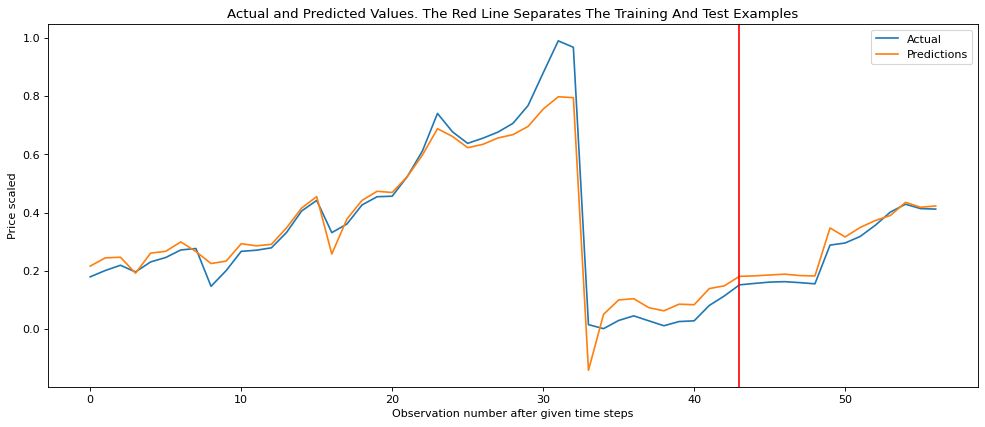

In [ ]:
plot_result(trainY, testY, train_predict, test_predict)

In this model we increased the split back to 0.75 which is closer to the original 0.8 split. We also increased the time steps to 6 from the original 2. The RSME was 0.026 in this model which is better than model 2 but worse than the original model (0.019) which is likely due to a combination of the train test split and the time steps. 